# Team 6 Project: MINJUSTICIA

In [3]:
import pandas as pd
import numpy as np
import calendar
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_rows = 7
import requests
import io
from datetime import datetime
import geopandas
import branca
import folium # package for making maps, please make sure to use a version older than 1.0.0.
from folium.plugins import TimeSliderChoropleth

Data

In [4]:
url="https://raw.githubusercontent.com/sagilar/ds4a-team6/master/retomintic/Data_UpdateJune13/reincidencia11junio2020_clean.csv"
df_mj = pd.read_csv(url,sep=",",encoding="utf-8")
df_mj

,INTERNOEN,DELITO,TITULO_DELITO,SUBTITULO_DELITO,TENTATIVA,AGRAVADO,CALIFICADO,FECHA_INGRESO,FECHA_SALIDA,FECHA_CAPTURA,...,ACTIVIDADES_ENSEÑANZA,NIVEL_EDUCATIVO,HIJOS_MENORES,CONDIC_EXPECIONAL,CODIGO_ESTABLECIMIENTO,ESTABLECIMIENTO,DEPTO_ESTABLECIMIENTO,MPIO_ESTABLECIMIENTO,REGIONAL,ESTADO
0,5496C737C624136DB406CFC6744C684C070A3CD8,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,01/01/10,12/05/11,30/12/09,...,NO,CICLO III,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Baja
1,1097561F306939C26DB4AC60377063DA7E2B079F,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES,CONTRA LA SALUD PUBLICA,DE LAS AFECTACIONES A LA SALUD PUBLICA,N,N,N,01/01/10,05/12/11,30/12/09,...,NO,CICLO I,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Baja
2,CB7033A707ADE673139F8A17CAD26AD54696C135,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,01/01/10,06/08/13,30/12/09,...,NO,CICLO I,SI,NaN,235,EPAMSCAS POPAYAN (ERE),CAUCA,POPAYAN,OCCIDENTE,Baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142896,856368363834654A5F64534163FE7C7EE6A8A1CA,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,11/06/20,NaN,13/08/16,...,NO,CICLO I,NO,CON DISCAPACIDAD,613,EPMSC ARMENIA,QUINDIO,ARMENIA,VIEJO CALDAS,Activo
142897,E5385D722533896751FBF38A2129D97966267AB1,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,S,N,N,11/06/20,NaN,09/06/20,...,NO,CICLO I,SI,AFRO COLOMBIANO,5373,COMPLEJO CARCELARIO Y PENITENCIARIO DE MEDELLI...,ANTIOQUIA,MEDELLIN,NOROESTE,Activo
142898,FA176CD9955DAF77F313343E29136E87FE8B0056,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,11/06/20,NaN,02/08/18,...,NO,CICLO IV,SI,NaN,204,EPMSC EL BORDO,CAUCA,EL BORDO,OCCIDENTE,Activo


In [5]:
df_mj.columns

Index(['INTERNOEN', 'DELITO', 'TITULO_DELITO', 'SUBTITULO_DELITO', 'TENTATIVA',
       'AGRAVADO', 'CALIFICADO', 'FECHA_INGRESO', 'FECHA_SALIDA',
       'FECHA_CAPTURA', 'SITUACION_JURIDICA', 'ANO_NACIMIENTO', 'EDAD',
       'GENERO', 'ESTADO_CIVIL', 'PAIS_INTERNO', 'DEPARTAMENTO', 'CIUDAD',
       'REINCIDENTE', 'ESTADO_INGRESO', 'ACTIVIDADES_TRABAJO',
       'ACTIVIDADES_ESTUDIO', 'ACTIVIDADES_ENSEÑANZA', 'NIVEL_EDUCATIVO',
       'HIJOS_MENORES', 'CONDIC_EXPECIONAL', 'CODIGO_ESTABLECIMIENTO',
       'ESTABLECIMIENTO', 'DEPTO_ESTABLECIMIENTO', 'MPIO_ESTABLECIMIENTO',
       'REGIONAL', 'ESTADO'],
      dtype='object')

In [6]:
df_mj["FECHA_CAPTURA"] = pd.to_datetime(df_mj["FECHA_CAPTURA"])
df_mj["FECHA_INGRESO"] = pd.to_datetime(df_mj["FECHA_INGRESO"])
df_mj["FECHA_CAPTURA"] = pd.to_datetime(df_mj["FECHA_CAPTURA"])

df_mj["MES_INGRESO_INT"]=df_mj["FECHA_INGRESO"].dt.strftime('%m')
df_mj

,INTERNOEN,DELITO,TITULO_DELITO,SUBTITULO_DELITO,TENTATIVA,AGRAVADO,CALIFICADO,FECHA_INGRESO,FECHA_SALIDA,FECHA_CAPTURA,...,NIVEL_EDUCATIVO,HIJOS_MENORES,CONDIC_EXPECIONAL,CODIGO_ESTABLECIMIENTO,ESTABLECIMIENTO,DEPTO_ESTABLECIMIENTO,MPIO_ESTABLECIMIENTO,REGIONAL,ESTADO,MES_INGRESO_INT
0,5496C737C624136DB406CFC6744C684C070A3CD8,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2010-01-01,12/05/11,2009-12-30,...,CICLO III,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Baja,01
1,1097561F306939C26DB4AC60377063DA7E2B079F,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES,CONTRA LA SALUD PUBLICA,DE LAS AFECTACIONES A LA SALUD PUBLICA,N,N,N,2010-01-01,05/12/11,2009-12-30,...,CICLO I,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Baja,01
2,CB7033A707ADE673139F8A17CAD26AD54696C135,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2010-01-01,06/08/13,2009-12-30,...,CICLO I,SI,NaN,235,EPAMSCAS POPAYAN (ERE),CAUCA,POPAYAN,OCCIDENTE,Baja,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142896,856368363834654A5F64534163FE7C7EE6A8A1CA,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2020-11-06,NaN,2016-08-13,...,CICLO I,NO,CON DISCAPACIDAD,613,EPMSC ARMENIA,QUINDIO,ARMENIA,VIEJO CALDAS,Activo,11
142897,E5385D722533896751FBF38A2129D97966267AB1,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,S,N,N,2020-11-06,NaN,2020-09-06,...,CICLO I,SI,AFRO COLOMBIANO,5373,COMPLEJO CARCELARIO Y PENITENCIARIO DE MEDELLI...,ANTIOQUIA,MEDELLIN,NOROESTE,Activo,11
142898,FA176CD9955DAF77F313343E29136E87FE8B0056,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2020-11-06,NaN,2018-02-08,...,CICLO IV,SI,NaN,204,EPMSC EL BORDO,CAUCA,EL BORDO,OCCIDENTE,Activo,11


individuals

In [7]:
individuals = df_mj["INTERNOEN"].unique()
print("length of complete df: " + str(df_mj["INTERNOEN"].count()))
print("length of unique individuals: "+ str(len(individuals)))


length of complete df: 142899
length of unique individuals: 78841


In [8]:
print("number of occurrences by individual")
occurrences = df_mj["INTERNOEN"].value_counts()
occurrences

number of occurrences by individual


71D8863489582B956956B3E244CF97F629E190F8    16
85F84CC906246E467ACC8D3CD73B576E0B264556    15
5F6A19F239D3786924DB4FEAC108F33219BFD205    14
                                            ..
8367F7217B0EC324A308CBD621AFEEB4B79FDCCA     1
CF33DFE62CEED6D3CDB09DED9FBC1A9CD818C78C     1
405CA7C1AC106F9152F831A138AD3DC0F117F782     1
Name: INTERNOEN, Length: 78841, dtype: int64

In [9]:
for item in occurrences.index:
    print("crimes of individual " + str(item) + ": ")
    crime_list_per_ind = df_mj["DELITO"].where(df_mj["INTERNOEN"]==item)
    for crime in crime_list_per_ind.dropna():
        print(crime + ", ", end="")
    #breaking to check just first ind
    break

crimes of individual 71D8863489582B956956B3E244CF97F629E190F8: 
CONCIERTO PARA DELINQUIR, CONCIERTO PARA DELINQUIR, CONSTREÑIMIENTO ILEGAL, DESPLAZAMIENTO FORZADO, DESPLAZAMIENTO FORZADO, DESTRUCCION Y APROPIACION DE BIENES PROTEGIDOS, FABRICACION  TRAFICO Y PORTE DE ARMAS Y MUNICIONES DE USO PRIVATIVO DE LAS FUERZAS ARMADAS, HOMICIDIO, HOMICIDIO, HOMICIDIO EN PERSONA PROTEGIDA, HURTO, HURTO, RECLUTAMIENTO ILICITO, SECUESTRO SIMPLE, TORTURA EN PERSONA PROTEGIDA, UTILIZACION ILEGAL DE UNIFORMES E INSIGNIAS, 

Ubicación geográfica

In [10]:
dept_count = df_mj["DEPTO_ESTABLECIMIENTO"].value_counts()
dept_count

BOGOTA D.C.                 19008
ANTIOQUIA                   18591
VALLE DEL CAUCA             17346
                            ...  
PUTUMAYO                      378
AMAZONAS                      349
SAN ANDRES Y PROVIDENCIA      252
Name: DEPTO_ESTABLECIMIENTO, Length: 29, dtype: int64

### Gender Information

['INTERNOEN', 'DELITO', 'TITULO_DELITO', 'SUBTITULO_DELITO', 'TENTATIVA',
       'AGRAVADO', 'CALIFICADO', 'FECHA_INGRESO', 'FECHA_SALIDA',
       'FECHA_CAPTURA', 'SITUACION_JURIDICA', 'ANO_NACIMIENTO', 'EDAD',
       'GENERO', 'ESTADO_CIVIL', 'PAIS_INTERNO', 'DEPARTAMENTO', 'CIUDAD',
       'REINCIDENTE', 'ESTADO_INGRESO', 'ACTIVIDADES_TRABAJO',
       'ACTIVIDADES_ESTUDIO', 'ACTIVIDADES_ENSEÑANZA', 'NIVEL_EDUCATIVO',
       'HIJOS_MENORES', 'CONDIC_EXPECIONAL', 'CODIGO_ESTABLECIMIENTO',
       'ESTABLECIMIENTO', 'DEPTO_ESTABLECIMIENTO', 'MPIO_ESTABLECIMIENTO',
       'REGIONAL', 'ESTADO']

In [13]:
df_mj_no_duplicates = df_mj[~df_mj.duplicated(['INTERNOEN'])]
df_mj_no_duplicates

,INTERNOEN,DELITO,TITULO_DELITO,SUBTITULO_DELITO,TENTATIVA,AGRAVADO,CALIFICADO,FECHA_INGRESO,FECHA_SALIDA,FECHA_CAPTURA,...,NIVEL_EDUCATIVO,HIJOS_MENORES,CONDIC_EXPECIONAL,CODIGO_ESTABLECIMIENTO,ESTABLECIMIENTO,DEPTO_ESTABLECIMIENTO,MPIO_ESTABLECIMIENTO,REGIONAL,ESTADO,MES_INGRESO_INT
0,5496C737C624136DB406CFC6744C684C070A3CD8,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2010-01-01,12/05/11,2009-12-30,...,CICLO III,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Baja,01
1,1097561F306939C26DB4AC60377063DA7E2B079F,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES,CONTRA LA SALUD PUBLICA,DE LAS AFECTACIONES A LA SALUD PUBLICA,N,N,N,2010-01-01,05/12/11,2009-12-30,...,CICLO I,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Baja,01
2,CB7033A707ADE673139F8A17CAD26AD54696C135,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2010-01-01,06/08/13,2009-12-30,...,CICLO I,SI,NaN,235,EPAMSCAS POPAYAN (ERE),CAUCA,POPAYAN,OCCIDENTE,Baja,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142894,E5551238168C284F73834D203E0EAD0679E5168C,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,N,S,S,2020-10-06,NaN,2019-01-09,...,CICLO III,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Activo,10
142896,856368363834654A5F64534163FE7C7EE6A8A1CA,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2020-11-06,NaN,2016-08-13,...,CICLO I,NO,CON DISCAPACIDAD,613,EPMSC ARMENIA,QUINDIO,ARMENIA,VIEJO CALDAS,Activo,11
142898,FA176CD9955DAF77F313343E29136E87FE8B0056,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2020-11-06,NaN,2018-02-08,...,CICLO IV,SI,NaN,204,EPMSC EL BORDO,CAUCA,EL BORDO,OCCIDENTE,Activo,11


UNION LIBRE       19798
SOLTERO(A)        11847
CASADO(A)          1562
                  ...  
DIVORCIADO(A)        28
PENDIENTE POR        10
RELIGIOSO(A)          1
Name: ESTADO_CIVIL, Length: 8, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

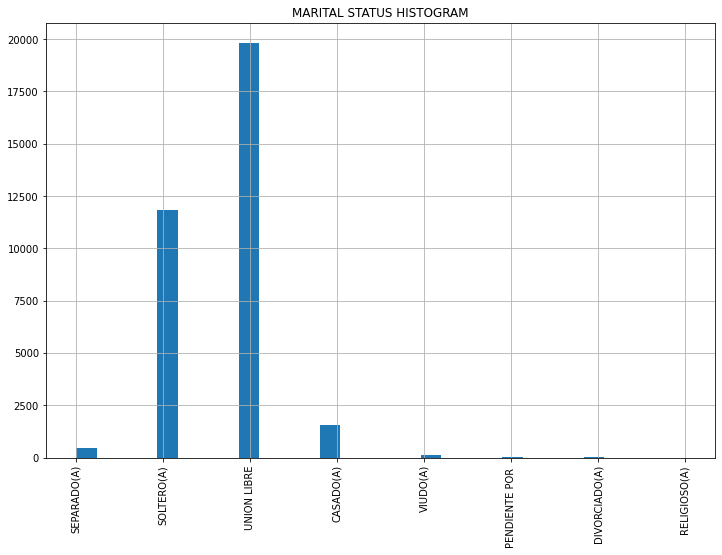

In [38]:
fig = plt.figure(figsize=(12,8))
print(df_mj_no_duplicates['ESTADO_CIVIL'].value_counts())
df_mj_no_duplicates['ESTADO_CIVIL'].hist(bins=30)
plt.title("MARITAL STATUS HISTOGRAM")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'MINOR CHILDREN HISTOGRAM')

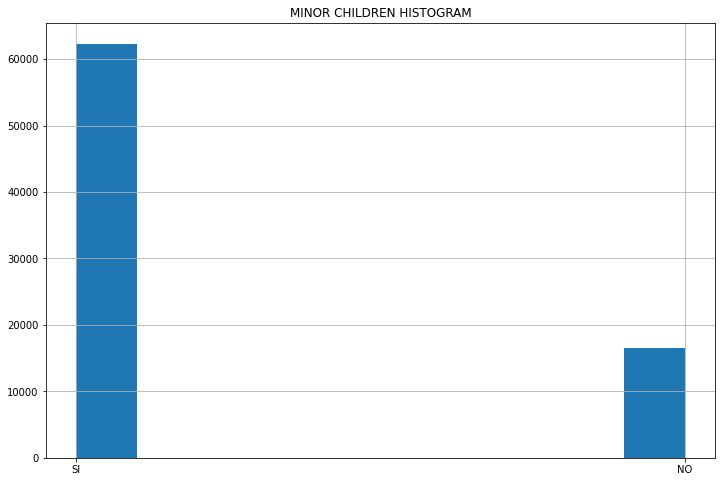

In [39]:
fig = plt.figure(figsize=(12,8))
df_mj_no_duplicates["HIJOS_MENORES"].hist()
plt.title("MINOR CHILDREN HISTOGRAM")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

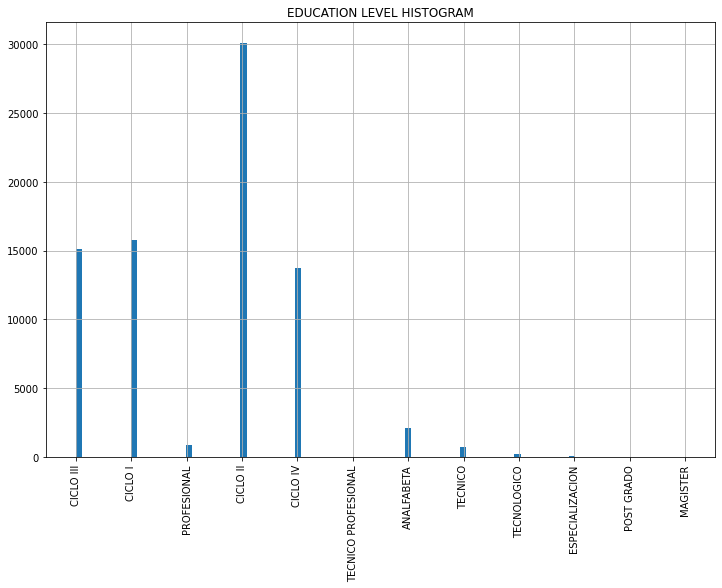

In [40]:
fig = plt.figure(figsize=(12,8))
df_mj_no_duplicates["NIVEL_EDUCATIVO"].hist(bins=100)
plt.title("EDUCATION LEVEL HISTOGRAM")
plt.xticks(rotation=90)


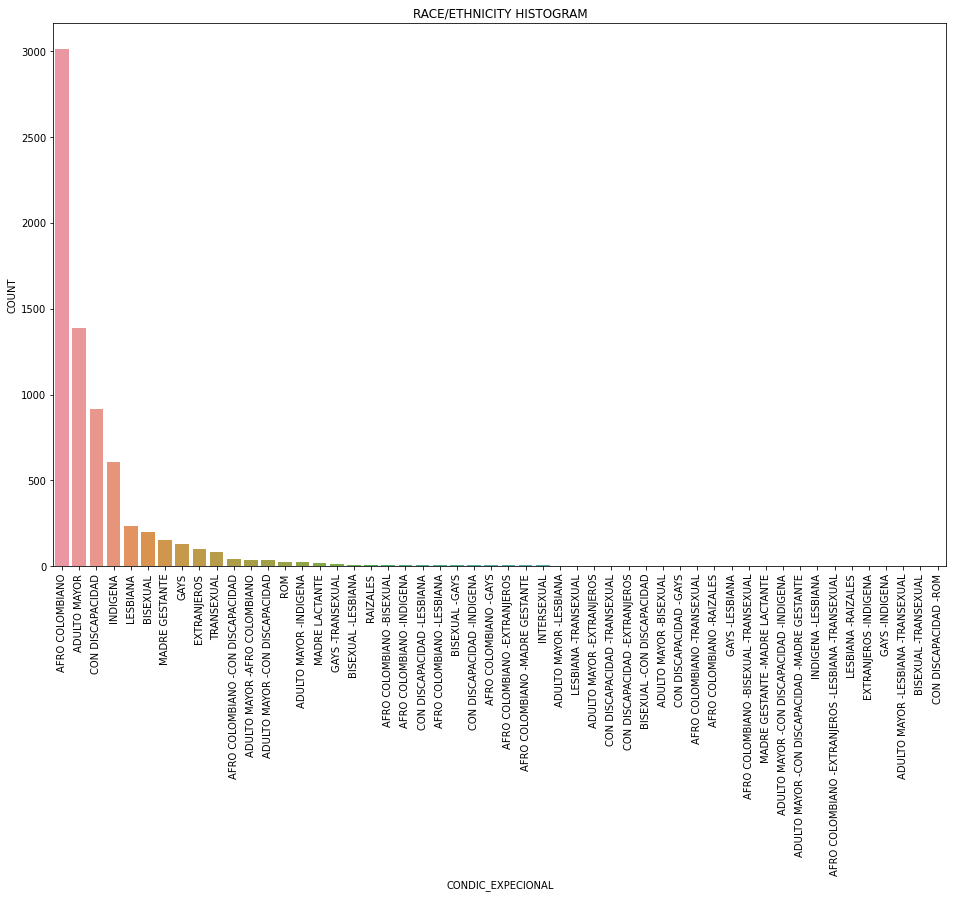

In [18]:
df_mj_etn=df_mj_no_duplicates["CONDIC_EXPECIONAL"].value_counts().reset_index()
df_mj_etn.columns=["CONDIC_EXPECIONAL","COUNT"]
fig = plt.figure(figsize=(16,10))
#df_mj["CONDIC_EXPECIONAL"].hist(bins=100)
plt.title("RACE/ETHNICITY HISTOGRAM")
A=plt.xticks(rotation=90)
etn_bc = sns.barplot(x="CONDIC_EXPECIONAL", y="COUNT",data=df_mj_etn)


In [19]:
df_mj_no_duplicates['GENERO'].value_counts()

MASCULINO    72228
FEMENINO      6613
Name: GENERO, dtype: int64

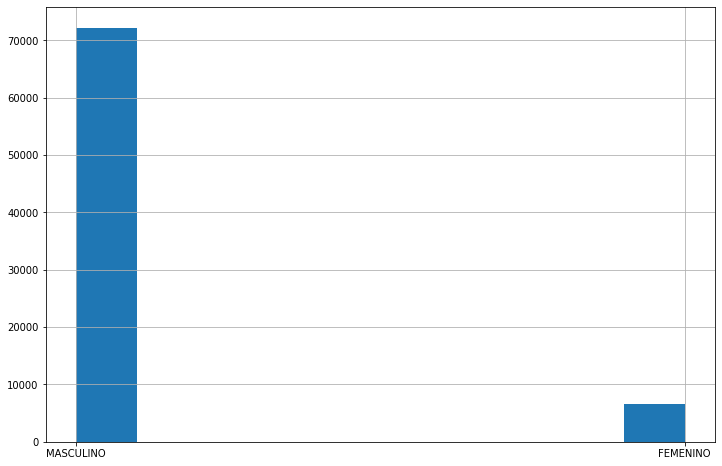

In [41]:
fig = plt.figure(figsize=(12,8))
df_mj_no_duplicates["GENERO"].hist()

30    3437
29    3347
35    3339
      ... 
92       2
93       1
91       1
Name: EDAD, Length: 75, dtype: int64


Text(0.5, 1.0, 'AGE HISTOGRAM OF MALE RECIDIVISTS')

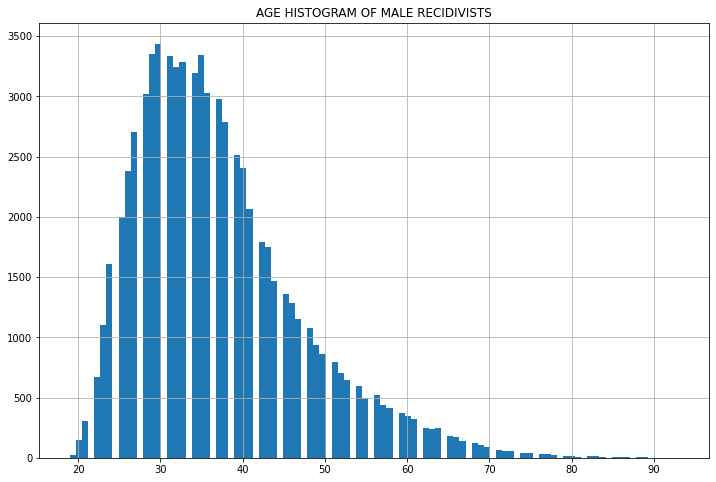

In [42]:
fig = plt.figure(figsize=(12,8))
df_mj_men = df_mj_no_duplicates[df_mj_no_duplicates["GENERO"]=="MASCULINO"]
print(df_mj_men["EDAD"].value_counts())
df_mj_men["EDAD"].hist(bins=100)
plt.title("AGE HISTOGRAM OF MALE RECIDIVISTS")

38    272
35    270
36    267
     ... 
89      1
94      1
83      1
Name: EDAD, Length: 70, dtype: int64


Text(0.5, 1.0, 'AGE HISTOGRAM OF FEMALE RECIDIVISTS')

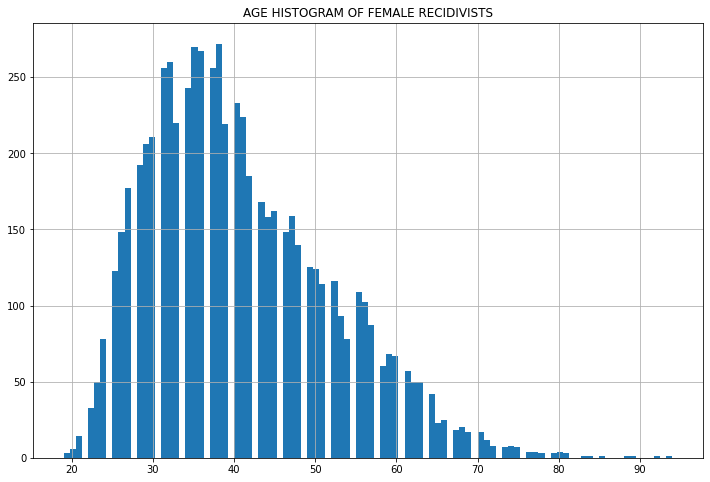

In [43]:
fig = plt.figure(figsize=(12,8))
df_mj_women = df_mj_no_duplicates[df_mj_no_duplicates["GENERO"]=="FEMENINO"]
print(df_mj_women["EDAD"].value_counts())
df_mj_women["EDAD"].hist(bins=100)
plt.title("AGE HISTOGRAM OF FEMALE RECIDIVISTS")

In [23]:
df_demo = df_mj_no_duplicates[["GENERO","EDAD","NIVEL_EDUCATIVO","HIJOS_MENORES","ESTADO_CIVIL","CONDIC_EXPECIONAL"]]
df_demo.head()

,GENERO,EDAD,NIVEL_EDUCATIVO,HIJOS_MENORES,ESTADO_CIVIL,CONDIC_EXPECIONAL
0,MASCULINO,48,CICLO III,SI,NaN,NaN
1,MASCULINO,58,CICLO I,SI,NaN,NaN
2,MASCULINO,38,CICLO I,SI,NaN,NaN
5,MASCULINO,32,CICLO III,SI,NaN,NaN
7,MASCULINO,57,PROFESIONAL,SI,NaN,NaN


In [30]:
df_demo_grp_age = df_demo.drop("HIJOS_MENORES",axis=1).groupby(by=["GENERO","NIVEL_EDUCATIVO","CONDIC_EXPECIONAL","ESTADO_CIVIL"]).describe()
df_demo_grp_age

EDAD        \
                                                         count  mean   
GENERO    NIVEL_EDUCATIVO CONDIC_EXPECIONAL ESTADO_CIVIL               
FEMENINO  ANALFABETA      ADULTO MAYOR      SOLTERO(A)     5.0  63.8   
                                            UNION LIBRE    2.0  73.5   
                                            VIUDO(A)       3.0  67.0   
...                                                        ...   ...   
MASCULINO ESPECIALIZACION ADULTO MAYOR      CASADO(A)      2.0  62.5   
                          AFRO COLOMBIANO   CASADO(A)      1.0  63.0   
                          BISEXUAL -GAYS    SOLTERO(A)     1.0  51.0   

                                                                          \
                                                               std   min   
GENERO    NIVEL_EDUCATIVO CONDIC_EXPECIONAL ESTADO_CIVIL                   
FEMENINO  ANALFABETA      ADULTO MAYOR      SOLTERO(A)    9.497368  56.0   
                                            UNION LIBRE   7.778175  68.0   
                                            VIUDO(A)      2.000000  65.0   
...                                                            ...   ...   
MASCULINO ESPECIALIZACION ADULTO MAYOR      CASADO(A)     0.707107  62.0   
                          AFRO COLOMBIANO   CASADO(A)          NaN  63.0   
                          BISEXUAL -GAYS    SOLTERO(A)         NaN  51.0   

                                                                              \
                                                            25%   50%    75%   
GENERO    NIVEL_EDUCATIVO CONDIC_EXPECIONAL ESTADO_CIVIL                       
FEMENINO  ANALFABETA      ADULTO MAYOR      SOLTERO(A)    59.00  60.0  64.00   
                                            UNION LIBRE   70.75  73.5  76.25   
                                            VIUDO(A)      66.00  67.0  68.00   
...                                                         ...   ...    ...   
MASCULINO ESPECIALIZACION ADULTO MAYOR      CASADO(A)     62.25  62.5  62.75   
                          AFRO COLOMBIANO   CASADO(A)     63.00  63.0  63.00   
                          BISEXUAL -GAYS    SOLTERO(A)    51.00  51.0  51.00   

                                                                
                                                           max  
GENERO    NIVEL_EDUCATIVO CONDIC_EXPECIONAL ESTADO_CIVIL        
FEMENINO  ANALFABETA      ADULTO MAYOR      SOLTERO(A)    80.0  
                                            UNION LIBRE   79.0  
                                            VIUDO(A)      69.0  
...                                                        ...  
MASCULINO ESPECIALIZACION ADULTO MAYOR      CASADO(A)     63.0  
                          AFRO COLOMBIANO   CASADO(A)     63.0  
                          BISEXUAL -GAYS    SOLTERO(A)    51.0  

[354 rows x 8 columns]

In [36]:
df_demo_grp_chld = df_demo.drop("EDAD",axis=1).groupby(by=["GENERO","NIVEL_EDUCATIVO","CONDIC_EXPECIONAL","ESTADO_CIVIL"]).describe()
df_demo_grp_chld

HIJOS_MENORES         \
                                                                 count unique   
GENERO    NIVEL_EDUCATIVO CONDIC_EXPECIONAL ESTADO_CIVIL                        
FEMENINO  ANALFABETA      ADULTO MAYOR      SOLTERO(A)               5      1   
                                            UNION LIBRE              2      1   
                                            VIUDO(A)                 3      1   
...                                                                ...    ...   
MASCULINO ESPECIALIZACION ADULTO MAYOR      CASADO(A)                2      2   
                          AFRO COLOMBIANO   CASADO(A)                1      1   
                          BISEXUAL -GAYS    SOLTERO(A)               1      1   

                                                                   
                                                         top freq  
GENERO    NIVEL_EDUCATIVO CONDIC_EXPECIONAL ESTADO_CIVIL           
FEMENINO  ANALFABETA      ADULTO MAYOR      SOLTERO(A)    SI    5  
                                            UNION LIBRE   SI    2  
                                            VIUDO(A)      SI    3  
...                                                       ..  ...  
MASCULINO ESPECIALIZACION ADULTO MAYOR      CASADO(A)     SI    1  
                          AFRO COLOMBIANO   CASADO(A)     SI    1  
                          BISEXUAL -GAYS    SOLTERO(A)    SI    1  

[354 rows x 4 columns]